# Lab #3

Today will be an introduction to coding convolutional neural networks (CNNs).

## Question 1: Classifying Digits
Let's revisit the MNIST dataset and build a CNN classifier.

Load the MNIST dataset provided by keras. This contains 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. Split the data into training and testing sets.

In [ ]:
# Import needed packages
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
from tensorflow.keras.datasets import reuters
from keras.utils import to_categorical
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [ ]:
# Load the data
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Print the shape of the training and testing datasets.

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Let's reshape the data to fit the keras format. Don't worry too much about this chunk for now.



In [ ]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

Now print the shape again to see what changed.



In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Question 2 in Homework 1 asks you to train a neural network on the Boston housing data. This dataset contains features on very different scales (for example there are both binary features and real-valued features). While the MNIST features take on values between 0 and 1 and do not need to be normalized, we will go through the exercise of normalizing the values before training our network.

Can you think of other algorithms in which normalization is necessary? Is it necessary in the case of neural networks? Why or why not?

- Clustering, PCA, random forest, etc. Not necessary (universal function approximator) but makes training easier in cases in which the features have very different scales. 


Normalize the data. Be sure to normalize the test set with the training set mean and standard deviation. Don't forget to convert the training and testing sets to `float32`.


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean = x_train.mean()
x_train -= mean
std = x_train.std()
x_train /= std

x_test -= mean
x_test /= std

How will the code above need to be changed for Boston housing dataset? Why?

- Need to calculate mean and standard deviation per feature, thus need to use something like `x_train.mean(axis=0)`.

Before we define and fit our model let's one-hot encode the labels. Don't forget to do the same for the testing labels and note you will not need to do this step in the case of regression.

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_train.shape

(60000, 10)

Now fit a shallow convolutional neural network with two `Dense` layers. Include one convolutional layer with 32 convolutional filters of size 3x3 and use the `relu` activation function.

After the convolutional layer, flatten the tensor to be fed into the `Dense` layers.

Add a `Dense` layer with 64 hidden nodes and `relu` activation function.

In the output `Dense` layer use enough output nodes to have one corresponding to each class label (10). What is the activation function you should use here?

In the optimizer use the `Adadelta` optimization function, and choose an appropriate loss function and model performance measure.

Run the network for 5 epochs and use a `batch_size` of 64.

In [ ]:
# Define model
model = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape = input_shape),

  layers.Flatten(),

  layers.Dense(64, activation='relu'),

  layers.Dense(10, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

model.fit(x_train, y_train, batch_size = 64, epochs = 5, verbose = 1)

Epoch 1/5
938/938 [==============================] - 33s 35ms/step - loss: 2.0830 - accuracy: 0.3188
Epoch 2/5
938/938 [==============================] - 33s 35ms/step - loss: 1.3687 - accuracy: 0.7354
Epoch 3/5
938/938 [==============================] - 33s 35ms/step - loss: 0.9190 - accuracy: 0.8273
Epoch 4/5
938/938 [==============================] - 33s 35ms/step - loss: 0.6983 - accuracy: 0.8517
Epoch 5/5
938/938 [==============================] - 33s 35ms/step - loss: 0.5801 - accuracy: 0.8694


Report the test set accuracy.



In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(test_acc)

0.8847000002861023


## Question 2: Classifying Dogs and Cats
The cats vs. dogs dataset that we will use isn't packaged with Keras. It was made available by Kaggle.com as part of a computer vision competition in late 2013, back when convnets weren't quite mainstream. You can download the original dataset at: https://www.kaggle.com/c/dogs-vs-cats/data (you will need to create a Kaggle account if you don't already have one -- don't worry, the process is painless).

The pictures are medium-resolution color JPEGs. They look like this:
![animals](https://drive.google.com/uc?id=1Xzd6kyXM06yiuxunE6XPGZh7vtVG0cYa)

Unsurprisingly, the cats vs. dogs Kaggle competition in 2013 was won by entrants who used convnets. The best entries could achieve up to 95% accuracy. In our own example, we will get fairly close to this accuracy, even though we will be training our models on less than 10% of the data that was available to the competitors. This original dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543MB large (compressed). We will be using a subset of the data containing three subsets: a training set with 1000 samples of each class, a validation set with 500 samples of each class, and finally a test set with 500 samples of each class.

First, add [this](https://drive.google.com/open?id=1a85IldM96jUcKyPnu22_ZbOmwc2aoFre) folder with images to your Google Drive. It will save to your "Shared with me" drive, you'll need to move it to "My Drive". It has the cat and dog images for this lab as well as other image datasets we'll use in the course. You can also download the images to your machine if you would like to run the code below in a Jupyter notebook.

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# The first time that you run this cell, you will need to authorize access in your drive. 
# Go to the link and copy the authorization code

Mounted at /content/drive


In [ ]:
# Define directories of where the training, validation and test sets reside
# Heather's: 
base_dir = 'drive/My Drive/Teaching/BST 261/2020/Colab Notebooks/In-class examples/Data/cats_dogs_small/'
# This is the path to where my files are - your path will be different, something like this:
# base_dir = 'drive/My Drive/Data/cats_dogs_small/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(base_dir, 'train/cats')
train_dogs_dir = os.path.join(base_dir, 'train/dogs')
validation_cats_dir = os.path.join(base_dir, 'validation/cats')
validation_dogs_dir = os.path.join(base_dir, 'validation/dogs')
test_cats_dir = os.path.join(base_dir, 'test/cats')
test_dogs_dir = os.path.join(base_dir, 'test/dogs')

In [ ]:
# Let's check the number of images in each set
print('Total training cat images:', len(os.listdir(train_cats_dir)))
print('Total training dog images:', len(os.listdir(train_dogs_dir)))
print('Total validation cat images:', len(os.listdir(validation_cats_dir)))
print('Total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('Total test cat images:', len(os.listdir(test_cats_dir)))
print('Total test dog images:', len(os.listdir(test_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500
Total test cat images: 500
Total test dog images: 500


### Creating a CNN from scratch
We've already built a small CNN for MNIST in the previous question. We will reuse the same general structure: our CNN will be a stack of alternated `Conv2D` (with `relu` activation) and `MaxPooling2D` layers.

However, since we are dealing with bigger images and a more complex problem, we will make our network accordingly larger. This serves both to augment the capacity of the network, and to further reduce the size of the feature maps, so that they aren't overly large when we reach the `Flatten` layer. 

Define a model with 3 `Conv2D` layers with 32, 64 and 128 3x3 filters respectively and `relu` activation function, each followed by a `MaxPooling2D` layer with a pool size of 2. Then add a `Flatten` layer followed by a `Dense` layer with 512 nodes and `relu` activation function. Finally, add an appropriate output layer. 

In [ ]:
# Define model
model = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape = (150, 150, 3)),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),

  layers.Flatten(),

  layers.Dense(512, activation='relu'),

  layers.Dense(1, activation='sigmoid')
])

[link text](https://)We can check out our model architecture using the following `.summary()` command. Here, since we start from inputs of size 150x150 (a somewhat arbitrary choice), we end up with feature maps of size 7x7 right before the `Flatten` layer.

Note that the depth of the feature maps is progressively increasing in the network (from 32 to 128), while the size of the feature maps is decreasing (from 148x148 to 17x17). This is a pattern that you will see in almost all CNNs.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

Now define how to compile the model with loss function, optimizer and accuracy metric.

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(),
              metrics = ['accuracy'])

As you know, data should be formatted into appropriately pre-processed floating point tensors before being fed into our network. Currently, our data sits on a drive as JPEG files, so the steps for getting it into our network are roughly:

1. Read the picture files.
2. Decode the JPEG content to RBG grids of pixels.
3. Convert these into floating point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

It may seem a bit daunting, but thankfully Keras has utilities to take care of these steps automatically. Keras has a module with image processing helper tools, located at `keras.preprocessing.image`. In particular, it contains the class `ImageDataGenerator` which allows to quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. This is what we will use here.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size = (150, 150),
        batch_size = 20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Fit the model to the data using the generator. It expects as first argument a Python generator that will yield batches of inputs and targets indefinitely, like ours does. Because the data is being generated endlessly, the generator needs to know how many samples to draw from the generator before declaring an epoch over. This is the role of the `steps_per_epoch` argument: after having drawn `steps_per_epoch` batches from the generator, i.e. after having run for `steps_per_epoch` gradient descent steps, the fitting process will go to the next epoch.

When using the generator, one may pass a `validation_data` argument, much like with the fit method. Importantly, this argument is allowed to be a data generator itself, but it could be a tuple of numpy arrays as well. If you pass a generator as `validation_data`, then this generator is expected to yield batches of validation data endlessly, and thus you should also specify the `validation_steps` argument, which tells the process how many batches to draw from the validation generator for evaluation. Train the model for 15 epochs.

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch = 100,
      epochs = 15,
      validation_data = validation_generator,
      validation_steps = 50)

Epoch 1/15
100/100 [==============================] - 1160s 12s/step - loss: 1.1413 - accuracy: 0.5236 - val_loss: 0.7022 - val_accuracy: 0.5000
Epoch 2/15
100/100 [==============================] - 100s 997ms/step - loss: 0.6951 - accuracy: 0.5809 - val_loss: 0.6491 - val_accuracy: 0.6350
Epoch 3/15
100/100 [==============================] - 99s 995ms/step - loss: 0.6460 - accuracy: 0.6757 - val_loss: 0.6164 - val_accuracy: 0.6540
Epoch 4/15
100/100 [==============================] - 100s 996ms/step - loss: 0.5373 - accuracy: 0.7436 - val_loss: 0.5905 - val_accuracy: 0.6820
Epoch 5/15
100/100 [==============================] - 100s 997ms/step - loss: 0.4563 - accuracy: 0.7829 - val_loss: 0.5910 - val_accuracy: 0.7010
Epoch 6/15
100/100 [==============================] - 100s 998ms/step - loss: 0.3642 - accuracy: 0.8320 - val_loss: 0.7021 - val_accuracy: 0.7170
Epoch 7/15
100/100 [==============================] - 100s 998ms/step - loss: 0.2645 - accuracy: 0.9097 - val_loss: 0.7538 - v

Plot the accuracy and loss for the train and validation sets.

In [ ]:
import seaborn as sns
sns.set()

train_acc  = history.history['accuracy']
train_loss = history.history['loss']
val_acc  = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

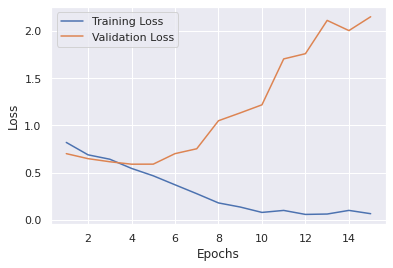

In [ ]:
plt.plot(epochs, train_loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

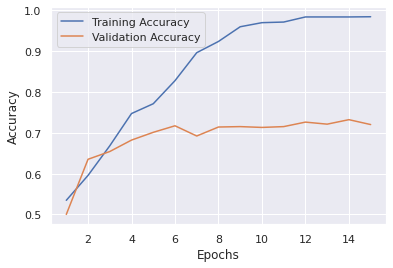

In [ ]:
plt.plot(epochs, train_acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Does the model appear to be overfitting? 
- Yes, the validation loss starts to increase after a few epochs.

